In [136]:
#Import Qiskit and Qiskit.Visualization and math for qc.ry
import qiskit
from qiskit import QuantumCircuit, assemble, Aer,execute
from qiskit.visualization import plot_histogram,plot_bloch_multivector
from math import pi

In [137]:
#Set Current Qiskit Backend to QASM Simulator 
#Switch if using IBM Quantum Computers
sim=Aer.get_backend('qasm_simulator')

In [138]:
#Intializes Quantum Circuit with 1 Qubit and 1 Classical Bit
qc=QuantumCircuit(1,1)
sim_run=1000000

In [139]:
#Specifies P(|1>) (Probability of |1>)
#P(|0>)=(1-P(|1>))
Prob_Value=int(input("Specify Required Distribution Percentage of |1>(Enter from 0 to 100)"))

In [141]:
#Calculates rotation required by Y axis(utilizing a Quintic Polynomial equation) in order to generate required distribution of |0> and |1>
qc.ry(((Prob_Value/(13.402+4.378767*(Prob_Value)-0.1111414*(Prob_Value**2)+0.001790532*(Prob_Value**3)-0.00001477378*(Prob_Value**4)+(4.564002*(10**-8))*(Prob_Value**5)))*pi),0)

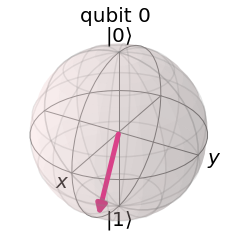

In [142]:
#Run code to check Bloch spheres of Qubits in superposition
#qc.save_statevector()
#qobj=assemble(qc)
#result=sim.run(qobj).result().get_statevector()
#plot_bloch_multivector(result)

In [143]:
#Collapses superposition of every Qubit and assigns value to corrosponding Classical bit
qc.measure(0,0)

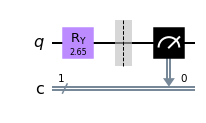

In [144]:
#Creates barrier between gates and measurements for qc.draw() and optimization level
#qc.draw()

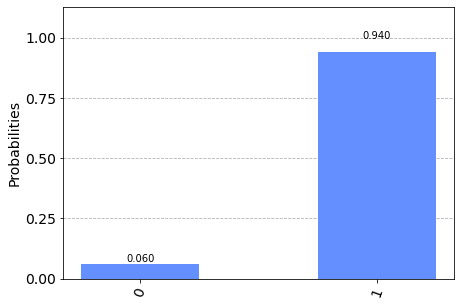

In [145]:
#displays probabilities of all Qubit values
job=execute(qc,sim,shots=sim_run)
result=job.result()
counts=result.get_counts()
plot_histogram(counts)